### 1. 算法简介

- **RPCA描述**：RPCA（稳健主成分分析）用于恢复受损的低秩矩阵，将其分解为低秩矩阵和稀疏矩阵的和。
  
- **RPCA实现**：对于一个给定的数据矩阵，RPCA通过最小化核范数和$L_1$范数的加权组合，<mark>将其分解为低秩矩阵和稀疏矩阵的和</mark>。
  
- **RPCA缺点**：但RPCA假设误差矩阵是稀疏的，且用$L_1$范数来度量，而$L_1$范数常常导致有偏估计，精确度不如预期。
  
- $\bf{L_{1-2}}$**代替**$\bf{L_1}$**的改进**：$L_{1-2}=L_1-L_2$，可以比$L_1$更好地作为$L_0$范数的近似，以此更好地度量误差矩阵的稀疏性。

### 2. 算法流程

#### 2.1. 范数定义

给定一个数据集 $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_s]$，其中每个 $\mathbf{x}_i$ 是一个样本。矩阵 $\mathbf{X}$ 的核范数定义为 $\|\mathbf{X}\|_{*} = \sum_{i} \sigma_{i}$，即 $\mathbf{X}$ 的奇异值之和。此外，矩阵 $\mathbf{X}$ 的 $L_2$ 和 $L_1$ 范数分别定义为 $\|\mathbf{X}\|_{F} = \sqrt{\sum_{i,j} (\mathbf{X}_{ij})^{2}}$ 和 $\|\mathbf{X}\|_{1} = \sum_{i,j} |\mathbf{X}_{ij}|$，其中 $\mathbf{X}_{ij}$ 表示矩阵的第 $(i, j)$ 项。

#### 2.2. 稳健主成分分析（RPCA）
数据 $\mathbf{X}$ 通常是被破坏的。RPCA 尝试将 $\mathbf{X}$ 分解为两个矩阵 $\mathbf{D}$ 和 $\mathbf{E}$，其中矩阵 $\mathbf{D}$ 被假定为低秩矩阵，而 $\mathbf{E}$ 被假定为稀疏矩阵。分解模型如下所示：
$$
\min_{\mathbf{D}, \mathbf{E}} \|\mathbf{D}\|_{*} + \lambda \|\mathbf{E}\|_{1} \quad \text{subject to} \quad \mathbf{X} = \mathbf{D} + \mathbf{E}.
$$
存在许多求解 RPCA 模型的算法，例如不精确增广拉格朗日乘子算法（inexact ALM）[16] 和加速近端梯度方法[11]。
#### 2.3. $L_{1-2}$ 度量
向量的 $l_{1-2}$ 度量首先在 [9] 中提出，用于非负最小二乘问题，然后在 [10] 中应用于压缩感知问题。对于向量 $\mathbf{x}$，其 $l_{1-2}$ 度量定义为 $\|\mathbf{x}\|_{1} - \|\mathbf{x}\|_{2}$。类似地，对于矩阵 $\mathbf{X}$，其 $L_{1-2}$ 度量定义为：
$$
\|\mathbf{X}\|_{1-2} \triangleq \|\mathbf{X}\|_{1} - \|\mathbf{X}\|_{F}.
$$
#### 2.4. DC 编程
DC（差分凸函数算法）算法是一种特殊的优化，其目标函数可以分解为两个凸函数之差。DC 编程的形式如下：
$$
\min \{ f(x) = g(x) - h(x) : x \in \mathbb{R}^{n} \}
$$
其中 $g$ 和 $h$ 是凸函数。这样的函数 $f$ 被称为 DC 函数，而 $g - h$ 是 $f$ 的 DC 分解，$g$ 和 $h$ 是 $f$ 的 DC 组成部分。DC 算法的构造涉及 DC 组成部分 $g$ 和 $h$，而不是函数 $f$ 本身。DC 算法总结在算法1中，其中使用一阶近似来替代非凸部分。
#### 2.5. 模型表示
受到 $l_{1-2}$ 度量在压缩感知问题中比 $l_0$ 范数更好的近似的启发，本文将向量的 $l_{1-2}$ 度量扩展到矩阵的 $L_{1-2}$ 度量，并应用于恢复受损数据。所提出的方法称为基于 $L_{1-2}$ 度量的稳健主成分分析（RPCA-$L_{1-2}$），其公式如下：
$$
\min_{\mathbf{D}, \mathbf{E}} \|\mathbf{D}\|_{*} + \lambda \|\mathbf{E}\|_{1-2} \quad \text{subject to} \quad \mathbf{X} = \mathbf{D} + \mathbf{E}.
$$
RPCA-$L_{1-2}$ 使用 $L_{1-2}$ 度量来衡量数据误差，而不是 RPCA 中的 $L_{1}$ 度量。
#### 2.6. 算法求解
优化问题 (4) 等价于：
$$
\min_{\mathbf{E}} F(\mathbf{E}) - G(\mathbf{E}),
$$
其中 $F(\mathbf{E})$ 和 $G(\mathbf{E})$ 是两个凸函数，定义如下：
$$
\begin{cases}
F(\mathbf{E}) = \|\mathbf{X} - \mathbf{E}\|_{*} + \lambda \|\mathbf{E}\|_{1} \\
G(\mathbf{E}) = \lambda \|\mathbf{E}\|_{F}
\end{cases}.
$$
这里 $F$ 和 $G$ 是凸函数。用DC算法可以用于求解 (5)，如下图所示：

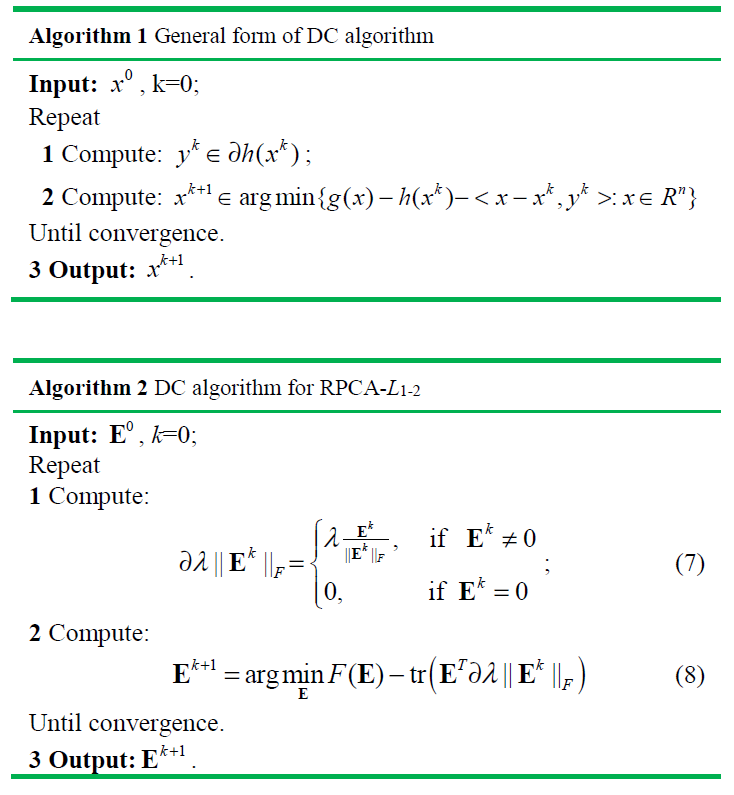

在步骤 $k$ 中，如果 $\mathbf{E}^{k} = 0$，那么 (8) 是RPCA，可以通过不精确增广拉格朗日乘子算法（inexact ALM）求解。如果 $\mathbf{E}^{k} \neq 0$，问题 (8) 也可以通过不精确增广拉格朗日乘子算法（inexact ALM）求解。在这种情况下，问题 (8) 的增广拉格朗日函数为：

$$
L_{\mu}(\mathbf{D}, \mathbf{E}, \mathbf{Y}) = \|\mathbf{D}\|_{*} + \lambda \|\mathbf{E}\|_{1} - \mathrm{tr}\left(\mathbf{E}^{T}\partial \lambda \|\mathbf{E}^{k}\|_{F}\right) + \mathrm{tr}(\mathbf{Y}^{T}(\mathbf{X} - \mathbf{D} - \mathbf{E})) + \frac{\mu}{2} \|\mathbf{X} - \mathbf{D} - \mathbf{E}\|_{F}^{2} \quad (9)
$$

其中 $\mathbf{Y}$ 是拉格朗日乘子，$\mu$ 是惩罚参数。然后 (8) 可以通过交替更新 $\mathbf{D}$、$\mathbf{E}$ 和 $\mathbf{Y}$ 来求解。$\mathbf{D}$ 和 $\mathbf{Y}$ 的更新与RPCA一致。当固定 $\mathbf{D}$ 和 $\mathbf{Y}$ 时，可以通过优化增广拉格朗日函数来更新 $\mathbf{E}$。优化可以写成 (10)：
$$
\operatorname*{min}_{\mathbf{E}} \lambda \|\mathbf{E}\|_{1} - \mathrm{tr}\left[\left(\mathbf{Y} + \partial \lambda \|\mathbf{E}^{k}\|_{F}\right)^{T}\mathbf{E}\right] + \frac{\mu}{2} \|\mathbf{X} - \mathbf{D} - \mathbf{E}\|_{F}^{2} \quad (10)
$$
这可以等效地改写为：
$$
\min_{\mathbf{E}} \lambda \|\mathbf{E}\|_{1} + \frac{\mu}{2} \left\|\mathbf{X} - \mathbf{D} + \frac{1}{\mu} \left(\mathbf{Y} + \partial \lambda \|\mathbf{E}^{k}\|_{F}\right) - \mathbf{E}\right\|_{F}^{2} \quad (11)
$$
(11) 的解可以表示为：
$$
S_{\frac{\lambda}{\mu}}\left(\mathbf{X} - \mathbf{D} + \frac{1}{\mu} \left(\mathbf{Y} + \partial \lambda \|\mathbf{E}^{k}\|_{F}\right)\right) \quad (12)
$$
其中 $S_{\varepsilon}(\cdot)$ 是软阈值算子，定义为：
$$
S_{\varepsilon}(x) \triangleq \begin{cases}
x - \varepsilon, & \text{如果 } x > \varepsilon, \\
x + \varepsilon, & \text{如果 } x < -\varepsilon, \\
0, & \text{否则}.
\end{cases} \quad (13)
$$


### 3. 摘译

#### 3.1. 摘要（标题：基于L1−2度量的稳健主成分分析）

稳健主成分分析（RPCA）是一种新兴方法，用于精确恢复受损的低秩矩阵。给定一个数据矩阵，RPCA可以通过最小化核范数和L1范数的加权组合，将其精确地分解为低秩矩阵和稀疏矩阵的和。RPCA假设误差矩阵是稀疏的，并用L1范数来度量它。然而，L1范数常常导致有偏估计，解决方案的精确度也不如预期。最近，提出了一种被称为L1和L2范数之差的L1-2度量，作为L0范数的近似。受L1-2度量比凸L1范数更好地近似L0范数的启发，本文提出了一种基于L1-2度量的稳健主成分分析方法（RPCA-L1-2）来恢复受损数据。这种方法通过L1-2度量来衡量数据误差。此外，RPCA-L1-2通过DC（差分凸函数）编程来求解。在去除面部图像遮挡和监控视频背景建模方面的大量实验表明，所提出的方法是有效的。